# 회귀분석

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%precision 3
%matplotlib inline

In [2]:
df = pd.read_csv('python_stat_sample-master/data/ch12_scores_reg.csv')
n = len(df)
print(n)
df.head()

20


,quiz,final_test,sleep_time,school_method
0,4.2,67,7.2,bus
1,7.2,71,7.9,bicycle
2,0.0,19,5.3,bus
3,3.0,35,6.8,walk
4,1.5,35,7.5,walk


### 
## 단순회귀모형

### 회귀분석 : 복수의 변수를 사용하여, 어느 변수로부터 다른 변수의 값을 예측
### 설명변수 : 원인이 되는 변수
### 반응변수 : 결과과 되는 변수
## 
### 단순회귀모형 : 설명변수와 반응변수가 1개씩인 가장 단순한 모델
### ```np.polyfit(x, y, n)``` : n차 poly회귀모형 생성
### ```np.poly1d()``` : 인자에 회귀모형 입력시 회귀계수 반환 / x값 입력시 $\hat{y}$반환

In [14]:
x = np.array(df['quiz']) # 설명변수
y = np.array(df['final_test']) # 반응변수
p = 1 # 설명변수의 수

- 각각 $\beta_1, \;\; \beta_0$

In [17]:
poly_fit = np.polyfit(x, y, 1)
poly_fit

array([ 6.554, 23.699])

In [8]:
poly_1d = np.poly1d(poly_fit)
poly_1d

poly1d([ 6.554, 23.699])

In [23]:
xs = np.linspace(x.min(), x.max())
ys = poly_1d(xs)
xs.shape, ys.shape

((50,), (50,))

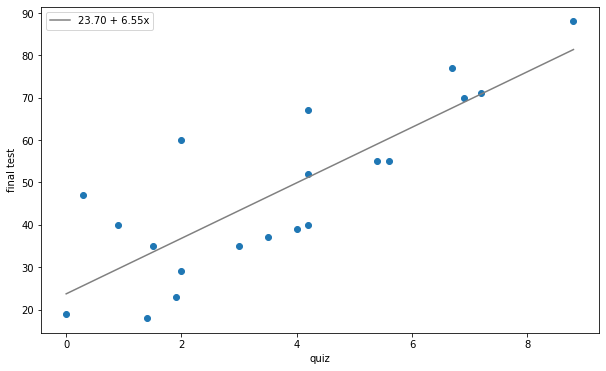

In [15]:
fig = plt.figure(figsize = (10, 6))
ax = fig.add_subplot(111)

ax.set_xlabel('quiz')
ax.set_ylabel('final test')

ax.plot(xs, ys, color = 'gray', 
        label = f'{poly_fit[1]:.2f} + {poly_fit[0]:.2f}x')
ax.scatter(x, y)

ax.legend()

plt.show()

## 
### 회귀분석에서의 가설
### 오차항 ($\epsilon_i$)
- **회귀모형에서 설명변수와 반응변수 사이의 관계에 대한 가정 (인과관계)** : $y = \beta_0 + \beta_1 x$
- **설명변수가 확률변수가 아님**
- **하지만 실제 결과와 회귀직선이 일치하지는 않으며, 확률적인 오차가 존재**

**$Y_i = \beta_0 + \beta_1 x_i + \epsilon_i\;\; (i = 1, 2, ..., n)$**

- **$\epsilon_i$는 서로 독립이고 $N(0, \sigma^2)$를 따름** (오차 독립성, 오차 정규성)
    
    **=> $Y_i \sim N(\beta_0 + \beta_1 x_i, \sigma^2)$**

### 

### 회귀직선, 회귀계수
 - **회귀분석은 표본인 $(x_1, Y_1), (x_2, Y_2), ... (x_n, Y_n)$으로부터 모수 $\beta_0$과 $\beta_1$을 추정$\;\;\;$ ($\hat{\beta_0}, \hat{\beta_1}$)**
    
- **=> $y = \hat{\beta_0} + \hat{\beta_1} x$**

#### 회귀계수 : 실제 인과관계의 계수($\beta$)의 추정값($\hat{\beta}$)

### 
### statsmodels에 의한 회귀분석

In [24]:
from scipy import stats
import statsmodels.formula.api as smf

### ```smf.ols(formula, data).fit()``` : 회귀모형 생성
### ```smf.ols(formula, data).fit().summary()``` : 회귀모형 분석결과 요약

- **Intercept** : 절편 
- **변수명** : 해당 변수
- **coef** : 회귀계수의 추정값
- **std err** : 추정값의 표준오차
- **t** : 회귀계수에 관한 t검정통계량
- **P > |t|** : t검정통계량의 p값
- **[0.025, 0.975]** : 회귀계수의 95% 신뢰구간

In [28]:
formula = 'final_test ~ quiz'
result = smf.ols('final_test ~ quiz', df).fit()
smf.ols('final_test ~ quiz', df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             final_test   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     37.61
Date:                Sat, 13 Aug 2022   Prob (F-statistic):           8.59e-06
Time:                        07:32:32   Log-Likelihood:                -76.325
No. Observations:                  20   AIC:                             156.7
Df Residuals:                      18   BIC:                             158.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     23.6995      4.714      5.028      0.000      13.796      33.603
quiz           6.5537      1.069      6.133      0.000       4.309       8.799
==============================================================================
Omnibus:                        2.139   Durbin-Watson:                   1.478
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.773
Skew:                           0.670   Prob(JB):                        0.412
Kurtosis:                       2.422   Cond. No.                         8.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 
### 점추정
- **데이터에 가장 잘 맞는 직선이란, $x_i$로부터 예측된 모형의 예측값 $\hat{y_i}$와 실제 데이터 $y_i$의 차이가 가장 작은 직선**

### 최소제곱법 (OLSE) :  잔차제곱합을 최소화 하는 $\hat{\beta_i}$를 계산
- **최소제곱법으로 구한 $\hat{\beta_i}$들은, ${\beta_i}$의 불편일치추정량**

**잔차 : $\epsilon_i = y_i - \hat{y_i}$**

**잔차제곱합 (RSS) : $\sum^n_i \hat{\epsilon_i^2}$**

### ```np.linalg.lstsq(x, y)``` : 최소제곱법 적용

In [31]:
X = np.array([np.ones_like(x), x]).T
X.shape, X, 

((20, 2),
 array([[1. , 4.2],
        [1. , 7.2],
        [1. , 0. ],
        [1. , 3. ],
        [1. , 1.5],
        [1. , 0.9],
        [1. , 1.9],
        [1. , 3.5],
        [1. , 4. ],
        [1. , 5.4],
        [1. , 4.2],
        [1. , 6.9],
        [1. , 2. ],
        [1. , 8.8],
        [1. , 0.3],
        [1. , 6.7],
        [1. , 4.2],
        [1. , 5.6],
        [1. , 1.4],
        [1. , 2. ]]))

- **최소제곱법으로 회귀계수 계산**

In [32]:
beta0_hat, beta1_hat = np.linalg.lstsq(X, y)[0]
beta0_hat, beta1_hat

C:\Users\이찬솔\AppData\Local\Temp\ipykernel_12940\1547428137.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  beta0_hat, beta1_hat = np.linalg.lstsq(X, y)[0]


(23.699, 6.554)

- **잔차 계산**

In [34]:
y_hat = beta0_hat + beta1_hat * x
eps_hat = y - y_hat
eps_hat

array([ 15.775,   0.114,  -4.699,  -8.361,   1.47 ,  10.402, -13.152,
        -9.638, -10.914,  -4.09 , -11.225,   1.08 ,  -7.807,   6.628,
        21.334,   9.39 ,   0.775,  -5.4  , -14.875,  23.193])

#### 잔차$\hat{\epsilon_i}$는 오차항 $\epsilon_i$에 대응하고 있기에, 잔차의 분산으로부터 모분산 $sigma^2$를 추정
- **잔차의 자유도는 회귀계수의 수 $\;(p + 1)$ 만큼 감소 => $\;\; n - p - 1$**

### $\hat{\sigma^2} = {1 \over {n-p-1}} \sum^n_i (\hat{\epsilon_i} - \bar{\hat{\epsilon_i}})^2 = {1\over {n-p-1}} \sum^n_i \hat{\epsilon_i^2}$

In [35]:
s_var = np.var(eps_hat, ddof = p + 1)
s_var

134.290

### 
### 구간추정
- **회귀계수 $\;\hat{\beta_0}, \;\; \hat{\beta_1}$의 표준오차 $\sqrt{C_0\;\hat{\sigma^2}},\;\;\sqrt{C_1\;\hat{\sigma^2}}$**
- **$(XX^T)^-1$의 대각성분 첫 번째 : $C_0,\;\;$  두 번째$C_1$**
### 

### 회귀계수 $\beta_0$, $\beta_1$의 신뢰수준 $100(1-\alpha)\%$의 신뢰구간

### [$\hat{\beta_i} - t_{\alpha/2}(n-2) \sqrt{C_0\;\hat{\sigma^2}}\;, \;\; \hat{\beta_i} - t_{1-\alpha/2}(n-2) \sqrt{C_1\;\hat{\sigma^2}} \;\;\; (i = 0, 1)$]

### 
### ```np.diag()``` : 대각원소 반환

In [36]:
C0, C1 = np.diag(np.linalg.pinv(np.dot(X.T, X)))

- **회귀계수의 표준오차 계산**

In [37]:
np.sqrt(s_var * C0), np.sqrt(s_var * C1)

(4.714, 1.069)

#### $\hat{\beta_0}$의 95% 신뢰구간

In [38]:
rv = stats.t(n - 2)

In [40]:
lcl = beta0_hat - rv.isf(0.025) * np.sqrt(s_var * C0)
hcl = beta0_hat - rv.isf(0.975) * np.sqrt(s_var * C0)
lcl, hcl

(13.796, 33.603)

#### $\hat{\beta_1}$의 95% 신뢰구간

In [ ]:
rv = stats.t(n - 2)

In [41]:
lcl = beta1_hat - rv.isf(0.025) * np.sqrt(s_var * C1)
hcl = beta1_hat - rv.isf(0.975) * np.sqrt(s_var * C1)
lcl, hcl

(4.309, 8.799)

### 
### t검정
- **귀무가설 : $\beta_i = 0$**
- **대립가설 : $\beta_i \neq 0$**

- **귀무가설이 기각된경우, 회귀계수는 통계적으로 유의**

### 검정통계량 :  $t = {{\hat{\beta_i}} \over {\sqrt{\hat{\sigma^2 C_i}}}} \sim t(n-2)$

In [42]:
t = beta1_hat / np.sqrt(s_var * C1) # 검정통계량
t

6.133

In [43]:
(1 - rv.cdf(t)) * 2 # p값

0.000

### 
# 
## 중회귀모형 : 설명변수가 2개 이상인 모형

In [44]:
formula = 'final_test ~ quiz + sleep_time'
result = smf.ols(formula, df).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             final_test   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     26.35
Date:                Sat, 13 Aug 2022   Prob (F-statistic):           6.19e-06
Time:                        08:01:21   Log-Likelihood:                -73.497
No. Observations:                  20   AIC:                             153.0
Df Residuals:                      17   BIC:                             156.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8709     11.635     -0.161      0.874     -26.420      22.678
quiz           6.4289      0.956      6.725      0.000       4.412       8.446
sleep_time     4.1917      1.778      2.357      0.031       0.440       7.943
==============================================================================
Omnibus:                        2.073   Durbin-Watson:                   1.508
Prob(Omnibus):                  0.355   Jarque-Bera (JB):                1.716
Skew:                           0.660   Prob(JB):                        0.424
Kurtosis:                       2.437   Cond. No.                         38.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 
### 회귀계수

In [48]:
x1 = df['quiz'] # 설명변수1
x2 = df['sleep_time'] # 설명변수2
y = df['final_test'] # 반응변수
p = 2 # 설명변수 개수

#### 최소제곱법으로 회귀계수 계산

In [46]:
X = np.array([np.ones_like(x1), x1, x2]).T
beta0_hat, beta1_hat, beta2_hat = np.linalg.lstsq(X, y)[0]
beta0_hat, beta1_hat, beta2_hat

C:\Users\이찬솔\AppData\Local\Temp\ipykernel_12940\2925482474.py:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  beta0_hat, beta1_hat, beta2_hat = np.linalg.lstsq(X, y)[0]


(-1.871, 6.429, 4.192)

#### 잔차 계산

In [53]:
y_hat = beta0_hat + beta1_hat * x1 + beta2_hat * x2
eps_hat = y - y_hat

#### 표준오차 계산

In [52]:
s_var = np.sum(eps_hat ** 2) / (n - p - 1)
C0, C1, C2 = np.diag(np.linalg.pinv(np.dot(X.T, X)))

#### $\beta_2$의 95% 신뢰구간

In [54]:
rv = stats.t(n - p - 1)

In [55]:
lcl = beta2_hat - rv.isf(0.025) * np.sqrt(s_var * C2)
hcl = beta2_hat - rv.isf(0.975) * np.sqrt(s_var * C2)
lcl, hcl

(0.440, 7.943)

### 
### 가변수

In [56]:
formula = 'final_test ~ quiz + sleep_time + school_method'
result = smf.ols(formula, df).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             final_test   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     13.46
Date:                Sat, 13 Aug 2022   Prob (F-statistic):           7.47e-05
Time:                        08:05:14   Log-Likelihood:                -72.368
No. Observations:                  20   AIC:                             154.7
Df Residuals:                      15   BIC:                             159.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.3330     12.434      0.107      0.916     -25.169      27.835
school_method[T.bus]     -1.8118      6.324     -0.286      0.778     -15.292      11.668
school_method[T.walk]    -7.6555      6.420     -1.192      0.252     -21.339       6.028
quiz                      6.0029      1.033      5.809      0.000       3.800       8.206
sleep_time                4.5238      1.809      2.501      0.024       0.668       8.380
==============================================================================
Omnibus:                        1.764   Durbin-Watson:                   1.418
Prob(Omnibus):                  0.414   Jarque-Bera (JB):                0.989
Skew:                           0.545   Prob(JB):                        0.610
Kurtosis:                       2.985   Cond. No.                         41.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 
# 
## 모형의 선택
### 과적합 : 주변 데이터 (훈련 데이터)에 지나치게 적합되어, 새로운 데이터에 대한 일반적인 예측성을 상실

In [66]:
x = np.array(df['quiz'])
y = np.array(df['final_test'])
p = 1

In [67]:
formula = 'final_test ~ quiz'
result = smf.ols(formula, df).fit()

### ```result.fittedvalues``` : 적합값

In [68]:
y_hat = np.array(result.fittedvalues)
y_hat

array([51.225, 70.886, 23.699, 43.361, 33.53 , 29.598, 36.152, 46.638,
       49.914, 59.09 , 51.225, 68.92 , 36.807, 81.372, 25.666, 67.61 ,
       51.225, 60.4  , 32.875, 36.807])

### ```result.resid``` : 잔차

In [69]:
eps_hat = np.array(result.resid)
eps_hat

array([ 15.775,   0.114,  -4.699,  -8.361,   1.47 ,  10.402, -13.152,
        -9.638, -10.914,  -4.09 , -11.225,   1.08 ,  -7.807,   6.628,
        21.334,   9.39 ,   0.775,  -5.4  , -14.875,  23.193])

#### 잔차제곱합 (RSS)

In [70]:
np.sum(eps_hat ** 2)

2417.228

## 
### 결정계수 ($R^2$)

### $R^2 = {{회귀변동} \over {총변동}} = 1 - {{잔차변동} \over {총변동}}$

### 
### 총변동 (SST) : $\;\;\; \sum^n_{i=1} (y_i - \bar{y})^2$
- **관측값 $y_i$가 어느 정도 분산되어 있는지를 나타냄**
- **자유도 : n - 1**

### 회귀변동 (SSR) : $\;\;\; \sum^n_{i=1} (\hat{y_i} - \bar{y})^2$
- **예측값 $\hat{y_i}$가 관측값의 평균값 $\bar{y}$에 대해서, 어느 정도 분산되어 있는지를 나타내는 지표**
- **$\hat{y_i}$가 $y_i$에 가까울수록 총변동에 가까워짐**
- **자유도 = p**

### 오차변동 (SSE) : $\;\;\; \sum^n_{i=1} (y_i - \hat{y_i})^2$
- **잔차가 어느 정도 분산되어 있는지를 나타냄**
- **예측값 $\hat{y_i}$가 관측값 $y_i$에 가까울수록 0에 가까워짐**
- **자유도 = n - p - 1**

### SST = SSR + SSE 
- **자유도의 합** : $\;\;\;\; n-1 = (p) + (n-p-1)$
### 

#### SST, SSR, SSE 계산

In [71]:
total_var = np.sum((y - np.mean(y))**2) # SST
exp_var = np.sum((y_hat - np.mean(y))**2) # SSR
unexp_var = np.sum(eps_hat ** 2) # SSE

In [72]:
total_var, exp_var + unexp_var

(7468.550, 7468.550)

#### 결정계수 계산

In [54]:
exp_var / total_var 

0.6763457665505

### 
### 조정결정계수 $\bar{R^2} = 1 - {{잔차변동 / (n-p-1)} \over {총변동 / (n-1)}}$
- **설명변수를 추가했을 때, 그 설명변수에 어느 정도 이상의 설명력이 없는 경우 결정계수의 값이 증가하지 않도록 조정**

In [56]:
1 - (unexp_var / (n - p - 1)) / (total_var / (n - 1))

0.6583649758033057

### 
### F검정
- **귀무가설 : $\beta_1 = \beta_2 = , ... = \beta_p = 0$**
- **대립가설 : 적어도 하나의 $\beta_i$는 0이 아니다**


### 검정통계량 : ${{회귀변동 \;/\; p} \over {잔차변동\; / \;(n-p-1)}}$
- **모형의 적합도가 좋을수록 잔차변동보다 회귀변동이 커지는 것을 이용**
- **분모와 분자는 각각, 잔차의 분산과 모형의 분산을 각각의 자유도로 나눈 분산비 검정 => 분산분석 (ANOVA)**

#### F검정통계량

In [74]:
f = (exp_var / p)  / (unexp_var / (n - p - 1))
f

37.615

#### p값

In [75]:
rv = stats.f(p, n - p - 1)
1 - rv.cdf(f)

0.000

### 
### 최대 로그 우도와 AIC

### 우도 (likelihood) : 어떤 관측값을 얻을 확률
### 최우추정법 : 관측값에서 가장 적절한 모수를 추정
### 최우추정량 (MLE) : 최우추정법에 의해 추측되는 추정량

### 
#### **예 : 0.3 확률의 성공 / 0.7 확률의 실패 => [실패, 성공, 실패, 실패, 성공] => $0.3 \;X\; 0.7\; X\; 0.3\; X \;0.3\; X \;0.7 = 0.031$**

1. **동전의 확률함수를 $f(x)$, 얻은 관측값을 $x_1, x_2, x_3, x_4, x_5$라고 하면**

    **$L = \prod^5_{i=1} f(x_i) = 0.3^2\;0.7^3 = 0.031$**

In [76]:
prob = 0.3
coin_result = [0, 1, 0, 0, 1]

In [77]:
rv = stats.bernoulli(prob)
L = np.prod(rv.pmf(coin_result))
L

0.031

2. **성공확률 $p$를 알지 못하는 상황에서, [실패, 성공, 실패, 실패, 성공]의 결과를 얻는 경우의 우도**

    **$L = \prod^5_{i=1} f(x_i) = p^2\;(1-p)^3$**

3. **모수 $p$를 알지 못하므로, 우도 $L$은 $p$에 대한 함수로 표현 => 우도함수 $L(p)$**

### 
#### $p$를 0에서 1로 변화시킬 때의 우도함수 시각화

In [82]:
ps = np.linspace(0, 1, 100)
Ls = [np.prod(stats.bernoulli(prob).pmf(coin_result))
      for prob in ps]

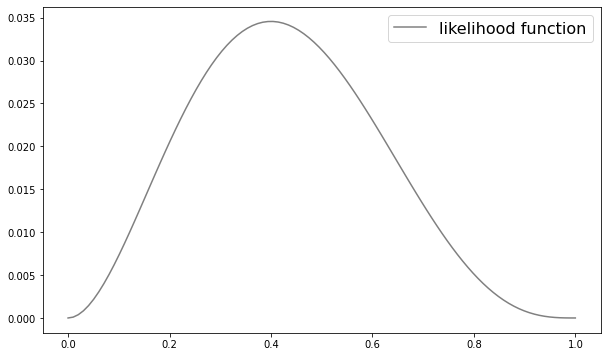

In [80]:
fig = plt.figure(figsize = (10, 6))
ax = fig.add_subplot(111)

ax.plot(ps, Ls, label = 'likelihood function', color = 'gray')

ax.legend(fontsize = 16)

plt.show()

- **$p$가 0.4일 때 최대 => $p = 0.4$가 가장 적절한 모수**

### 
### 로그우도 : $Log L = \sum_{i=1} \log f(x_i)$
- **우도는 확률의 곱이 되므로, 곱하면 곱할수록 0에 가까워 매우 작아짐 => 계산의 어려움 => 로그우도 계산** 
- **우도함수가 최대로 될 때 로그우도함수도 최대가 되므로, 최우추정은 로그우도 함수가 최대가 될 때의 파라미터로서 계산 가능** 

    **=> 그때의 로그우도의 값을 최대로그우도**

In [83]:
prod = 0.4
rv = stats.bernoulli(prob)
mll = np.sum(np.log(rv.pmf([0, 1, 0, 0, 1])))
mll

-3.478

### 
### 최대로그우도
- **단순회귀모형에서 $Y_i \sim N(\beta_0 + \beta_1 x_1, \; \sigma^2)$이라는 가정**
- **관측값 $(x_1, y_1), \;(x_2, y_2), ... , (x_n, y_n)$에 대한 최대로그우도는 모형의 데이터에 대한 적합이 좋다는 것을 나타냄**

- **$\beta_0, \beta_1, \sigma^2의 최우추정량은 각각 \hat{\beta_0}, \hat{\beta_1}, {1 \over n}\sum^n_{i=1}\hat{\epsilon_i}$**
- **최대로그우도는 파라미터를 최우추정량으로 했을 때의 관측값의 로그우도**
    
    **=> 최대로그우도는 $N(\hat{y}, \;{1 \over n}\sum^n_{i=1}\hat{\epsilon_i} )$의 밀도함수를 $f(x)$로 하여, $\sum^n_{i=1} \log f(y_i)$**
    
#### 최대로그우도는 값이 클수록 모형의 적합도가 높음

In [85]:
rv = stats.norm(y_hat, np.sqrt(unexp_var / n))
mll = np.sum(np.log(rv.pdf(y)))
mll

-76.325

### 
### AIC = $-2 \;\times\;최대로그우도\;+\;2\;\times\;회귀계수의 수 $
- **로그우도는 설명변수를 늘림으로써 값이 증가**

    **=> 모형의 복잡도 (설명변수의 수)와 데이터에 대한 적합도의 균형을 잡는 지표 (AIC)**

- **최대로그우도에 회귀계수의 수를 페널티로 부가**


In [87]:
aic = -2 * mll + 2 * (p + 1)
aic

156.650

### 
### BIC = $-2 \;\times\;최대로그우도\;+\;\log{n}\;\times\;회귀계수의 수$
- **회귀계수의 수에 더해 표본크기 n에 대해서도 페널티를 부가**

In [88]:
bic = -2 * mll + np.log(n) * (p+1) 
bic

158.642

### 
### 
## 모형의 타당성
#### 모형의 타당성 : 오차의 독립성, 오차의 정규성 여부를 확인

In [89]:
formula = 'final_test ~ quiz + sleep_time'
result = smf.ols(formula, df).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             final_test   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     26.35
Date:                Sat, 13 Aug 2022   Prob (F-statistic):           6.19e-06
Time:                        09:10:57   Log-Likelihood:                -73.497
No. Observations:                  20   AIC:                             153.0
Df Residuals:                      17   BIC:                             156.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8709     11.635     -0.161      0.874     -26.420      22.678
quiz           6.4289      0.956      6.725      0.000       4.412       8.446
sleep_time     4.1917      1.778      2.357      0.031       0.440       7.943
==============================================================================
Omnibus:                        2.073   Durbin-Watson:                   1.508
Prob(Omnibus):                  0.355   Jarque-Bera (JB):                1.716
Skew:                           0.660   Prob(JB):                        0.424
Kurtosis:                       2.437   Cond. No.                         38.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 
- 잔차

In [90]:
eps_hat = np.array(result.resid)

### 
### 오차정규성 검정
- **귀무가설 : 잔차항은 정규분포를 따른다**
- **대립가설 : 잔차항은 정규분포를 따르지 않는다**
- **```result.summary()```의 Omnibus : 검정통계량 / Prob(Omnibus) : p값**

### 왜도 : $\sum^n_i ({{x-\bar{x}}\over S})^3$
- **분포의 좌우대칭 측정**
- **0 : 좌우대칭 / 양수 : 좌측으로 치우침 / 음수 : 우측으로 치우침**

### ```stats.skew()```

In [92]:
from scipy import stats

In [93]:
stats.skew(eps_hat)

0.660

### 첨도 : $\sum^n_i ({{x-\bar{x}}\over S})^4$
- **분포의 뾰족한 정도를 측정**
- **3 : 정규분포 / 3보다 큼 : 정규분포보다 뾰족한 정점 / 3보다 작음 : 정규분포보다 평탄한 정점**

### ```stats.kurtosis()```

In [94]:
stats.kurtosis(eps_hat, fisher = False)

2.437

### 
### 오차독립성 검정
### 더빈-왓슨비 : $DW \; = \; {{\sum^n_{i=2} (\hat{\epsilon_i} - \hat{\epsilon_{i-1}})^2} \over {\sum^n_{i=1} \hat{\epsilon_i^2}}}$
- **0 ~ 4 사이이며**
- **0에 가까우면 양의 상관 / 4에 가까우면 음의 상관 /2 근처의 값이면 무상관**

In [96]:
np.sum(np.diff(eps_hat, 1) ** 2) / np.sum(eps_hat ** 2)

1.508

### 
### 다중공선성 : 설명변수 사이에 강한 상관

In [74]:
df['mid_test'] = df['quiz'] * 2
df.head()

,quiz,final_test,sleep_time,school_method,mid_test
0,4.2,67,7.2,bus,8.4
1,7.2,71,7.9,bicycle,14.4
2,0.0,19,5.3,bus,0.0
3,3.0,35,6.8,walk,6.0
4,1.5,35,7.5,walk,3.0


In [75]:
formula = 'final_test ~ quiz + mid_test'
result = smf.ols(formula, df).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             final_test   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     37.61
Date:                Thu, 13 Feb 2020   Prob (F-statistic):           8.59e-06
Time:                        11:57:40   Log-Likelihood:                -76.325
No. Observations:                  20   AIC:                             156.7
Df Residuals:                      18   BIC:                             158.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     23.6995      4.714      5.028      0.000      13.796      33.603
quiz           1.3107      0.214      6.133      0.000       0.862       1.760
mid_test       2.6215      0.427      6.133      0.000       1.723       3.519
==============================================================================
Omnibus:                        2.139   Durbin-Watson:                   1.478
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.773
Skew:                           0.670   Prob(JB):                        0.412
Kurtosis:                       2.422   Cond. No.                     1.30e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.16e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""